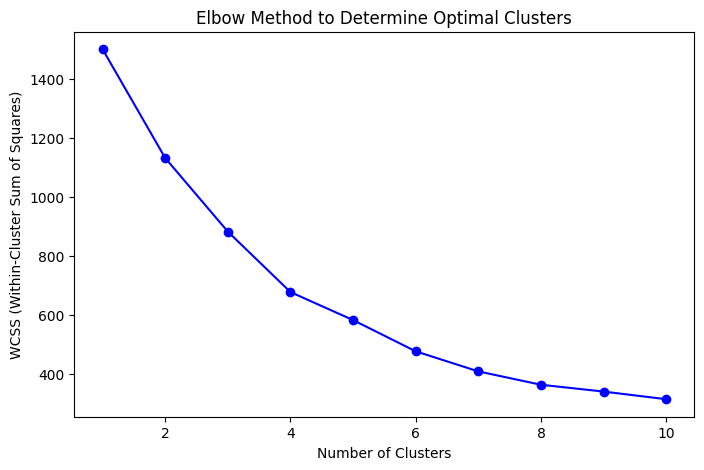

Silhouette Score for 4 clusters: 0.29


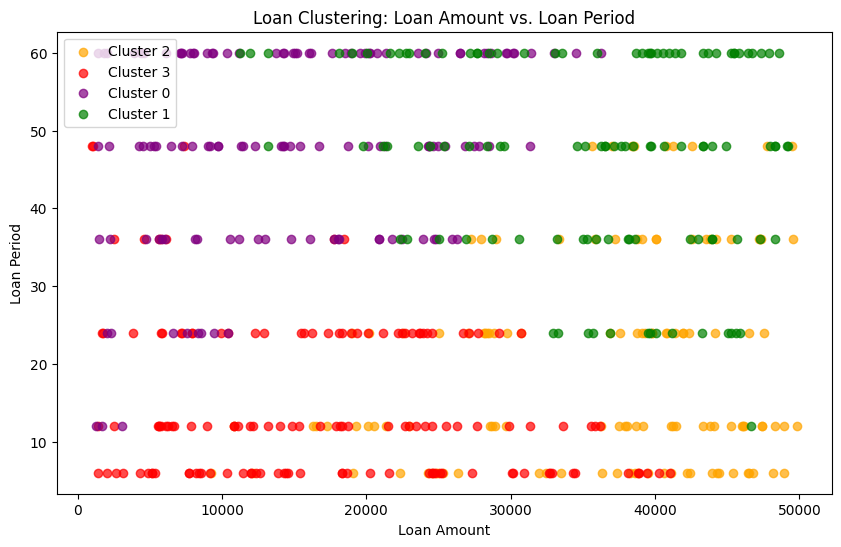

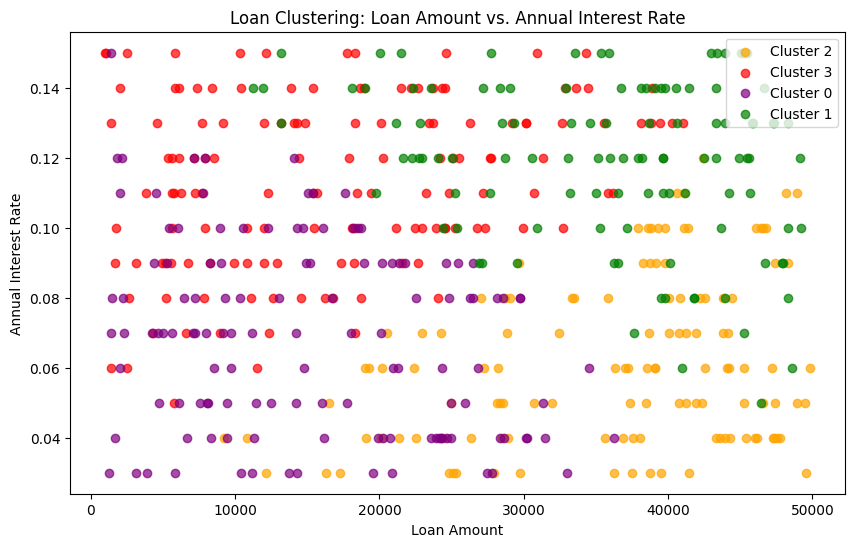

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/content/sample_loans.csv')

# Select features for clustering
features = ['Loan Amount', 'Loan Period', 'Annual Interest Rate']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Elbow Method to Find Optimal K
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.show()

# Optimal K (example: 4 clusters)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(data_scaled, data['Cluster'])
print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg:.2f}')

# Visualize Clusters: Loan Amount vs. Loan Period
plt.figure(figsize=(10, 6))
cluster_colors = ['purple', 'green', 'orange', 'red']
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Loan Amount'],
        cluster_data['Loan Period'],
        label=f'Cluster {cluster}',
        c=cluster_colors[cluster],
        alpha=0.7
    )
plt.title('Loan Clustering: Loan Amount vs. Loan Period')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Period')
plt.legend()
plt.show()

# Visualize Clusters: Loan Amount vs. Annual Interest Rate
plt.figure(figsize=(10, 6))
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Loan Amount'],
        cluster_data['Annual Interest Rate'],
        label=f'Cluster {cluster}',
        c=cluster_colors[cluster],
        alpha=0.7
    )
plt.title('Loan Clustering: Loan Amount vs. Annual Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Annual Interest Rate')
plt.legend()
plt.show()
